In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset from your specified file path
spotify_df = pd.read_csv(r"C:\Users\gaura\Downloads\spotify.csv")


In [ ]:
# Step 1: Data Quality Check
print("Initial Dataset Shape:", spotify_df.shape)
missing_values = spotify_df.isnull().sum()
print("Missing Values:\n", missing_values)
duplicate_rows = spotify_df.duplicated().sum()
print("Duplicate Rows:", duplicate_rows)

# Remove duplicates
spotify_df = spotify_df.drop_duplicates()
print("Dataset Shape After Removing Duplicates:", spotify_df.shape)


Initial Dataset Shape: (440, 5)
Missing Values:
 Artist           0
Track Name       0
Popularity       0
Duration (ms)    0
Track ID         0
dtype: int64
Duplicate Rows: 27
Dataset Shape After Removing Duplicates: (413, 5)


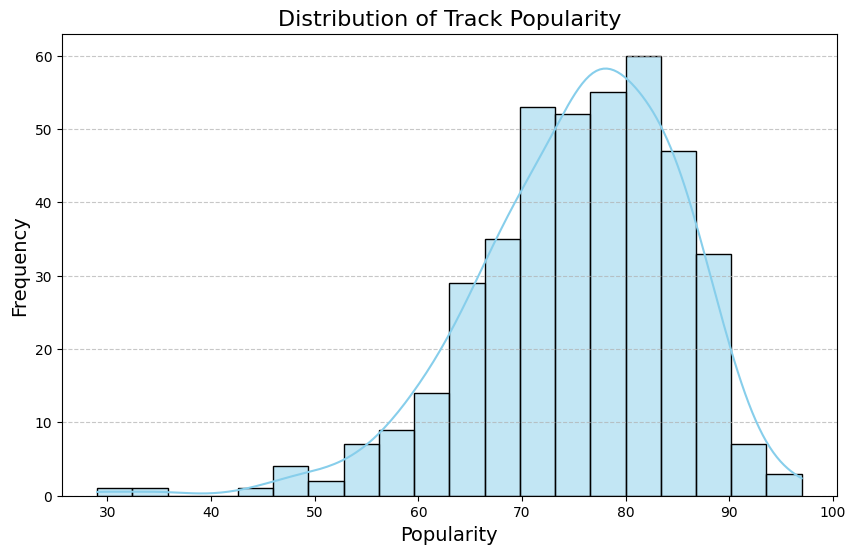

In [ ]:
# Step 2: Distribution of Popularity
plt.figure(figsize=(10, 6))
sns.histplot(spotify_df['Popularity'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Track Popularity', fontsize=16)
plt.xlabel('Popularity', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


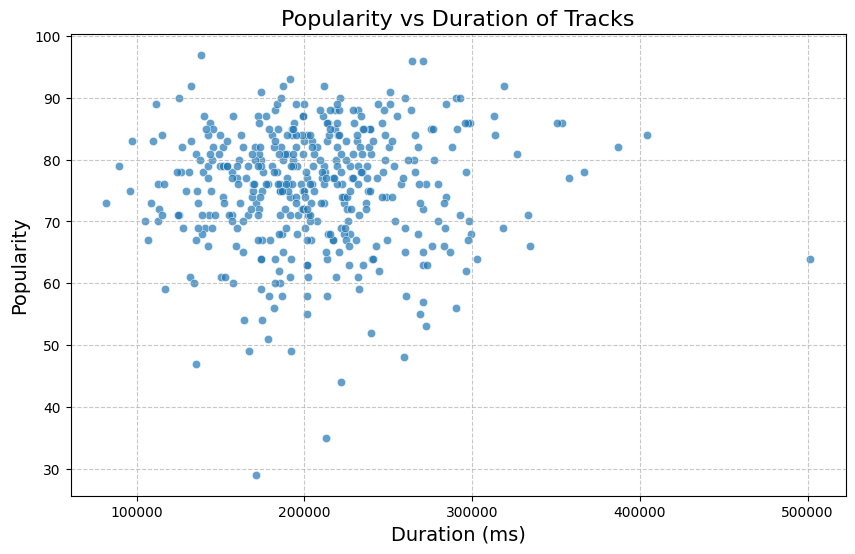

In [ ]:
# Step 3: Popularity vs Duration
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Duration (ms)', y='Popularity', data=spotify_df, alpha=0.7)
plt.title('Popularity vs Duration of Tracks', fontsize=16)
plt.xlabel('Duration (ms)', fontsize=14)
plt.ylabel('Popularity', fontsize=14)
plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.show()


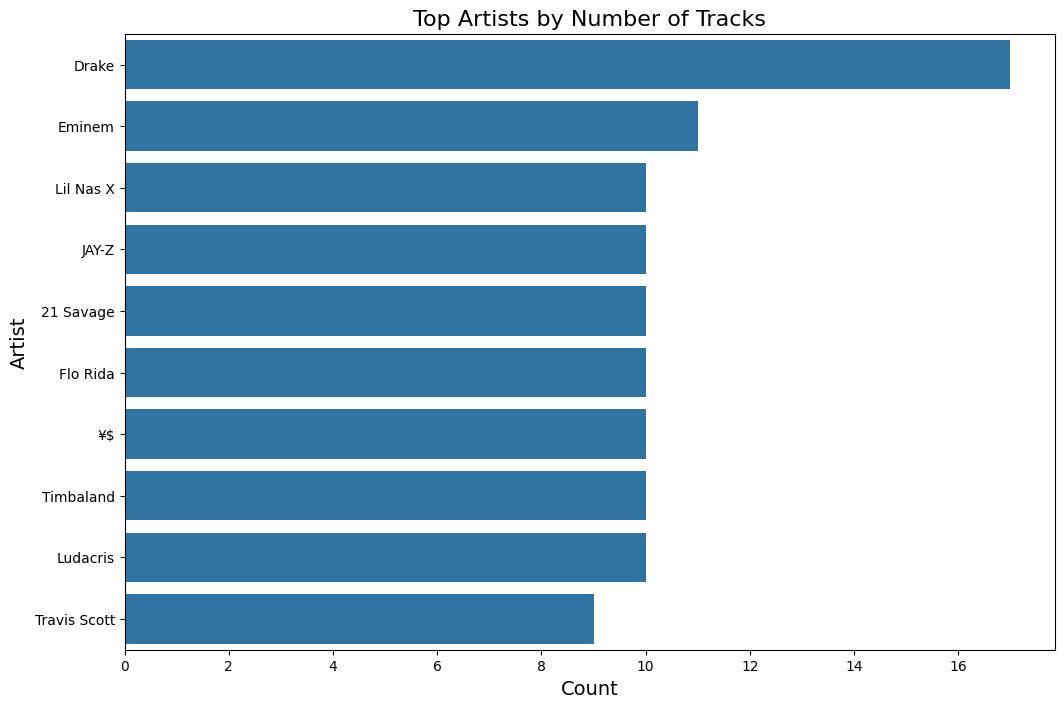

In [ ]:
# Step 4: Artist with Most Tracks
plt.figure(figsize=(12, 8))
sns.countplot(y='Artist', data=spotify_df, order=spotify_df['Artist'].value_counts().index[:10])
plt.title('Top Artists by Number of Tracks', fontsize=16)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Artist', fontsize=14)
plt.show()

In [ ]:
# Step 5: Top 5 Least Popular Tracks
least_popular = spotify_df.nsmallest(5, 'Popularity')[['Artist', 'Track Name', 'Popularity']]
print("Top 5 Least Popular Tracks:")
print(least_popular)


Top 5 Least Popular Tracks:
             Artist                     Track Name  Popularity
207          Pressa  Attachments (feat. Coi Leray)          29
231   Justin Bieber                     Intentions          35
413  French Montana                Splash Brothers          44
225        Lil Baby                  On Me - Remix          47
407     Wyclef Jean      911 (feat. Mary J. Blige)          48


In [ ]:
# Step 6: Top Artists by Average Popularity
top_artists = spotify_df['Artist'].value_counts().head(5).index
average_popularity = spotify_df[spotify_df['Artist'].isin(top_artists)].groupby('Artist')['Popularity'].mean()
print("Top 5 Artists by Average Popularity:")
print(average_popularity)

Top 5 Artists by Average Popularity:
Artist
21 Savage    83.800000
Drake        82.882353
Eminem       83.636364
JAY-Z        77.900000
Lil Nas X    75.900000
Name: Popularity, dtype: float64


In [ ]:
# Step 7: Most Popular Tracks for Top Artists
most_popular_tracks = spotify_df[spotify_df['Artist'].isin(top_artists)].sort_values(by=['Artist', 'Popularity'], ascending=[True, False])
most_popular_tracks = most_popular_tracks.groupby('Artist').first()[['Track Name', 'Popularity']]
print("Most Popular Tracks for Top Artists:")
print(most_popular_tracks)


Most Popular Tracks for Top Artists:
                                        Track Name  Popularity
Artist                                                        
21 Savage                                   redrum          96
Drake      Rich Baby Daddy (feat. Sexyy Red & SZA)          92
Eminem                                  Without Me          90
JAY-Z                              Ni**as In Paris          86
Lil Nas X                        THATS WHAT I WANT          81


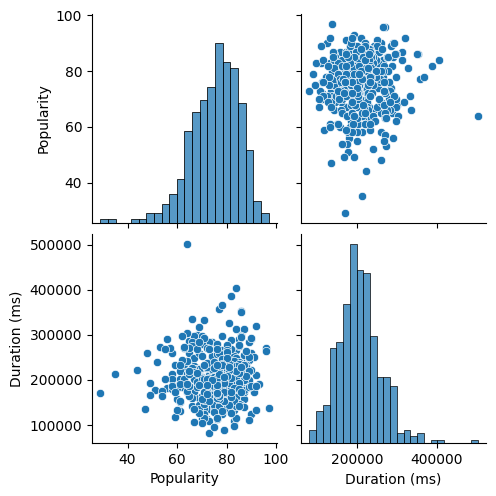

In [ ]:
# Step 8: Pair Plot for Numerical Variables
sns.pairplot(spotify_df[['Popularity', 'Duration (ms)']])
plt.show()


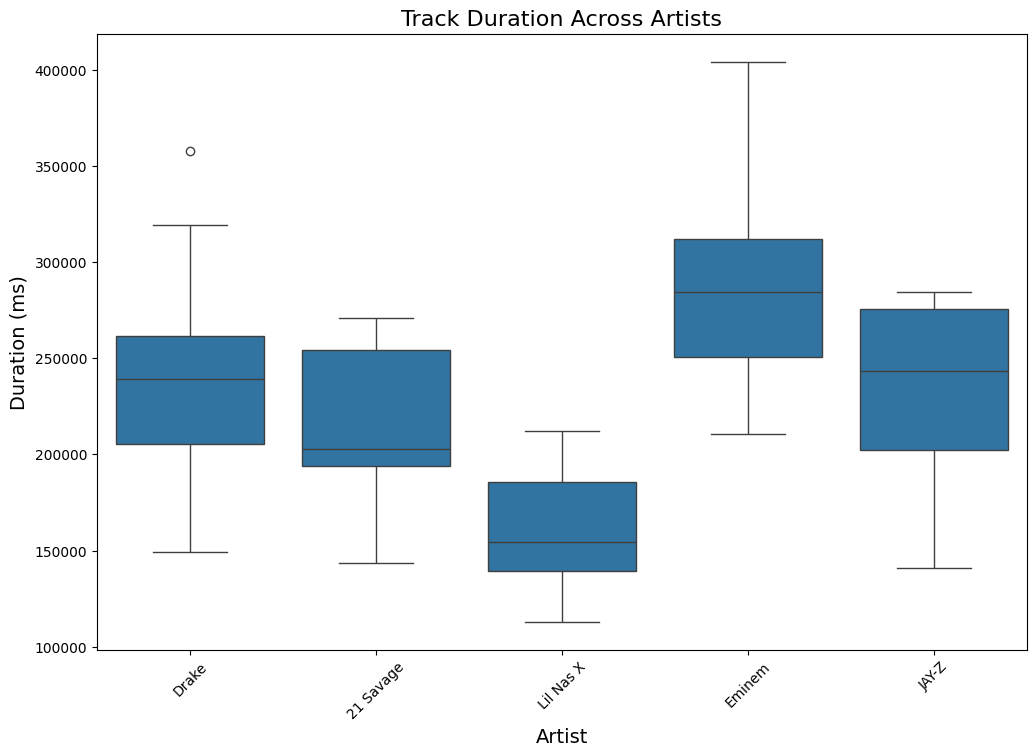

In [ ]:
# Step 9: Duration of Tracks Across Artists
plt.figure(figsize=(12, 8))
sns.boxplot(x='Artist', y='Duration (ms)', data=spotify_df[spotify_df['Artist'].isin(top_artists)])
plt.title('Track Duration Across Artists', fontsize=16)
plt.xlabel('Artist', fontsize=14)
plt.ylabel('Duration (ms)', fontsize=14)
plt.xticks(rotation=45)
plt.show()

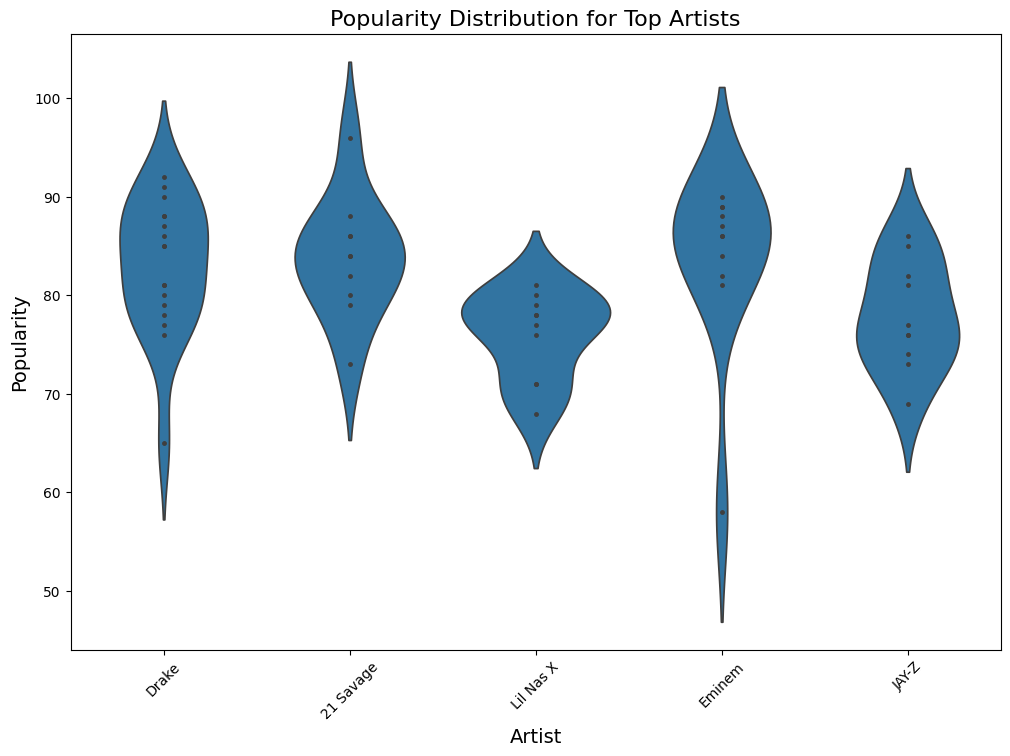

In [ ]:
# Step 10: Popularity Distribution for Artists
plt.figure(figsize=(12, 8))
sns.violinplot(x='Artist', y='Popularity', data=spotify_df[spotify_df['Artist'].isin(top_artists)], inner='point')
plt.title('Popularity Distribution for Top Artists', fontsize=16)
plt.xlabel('Artist', fontsize=14)
plt.ylabel('Popularity', fontsize=14)
plt.xticks(rotation=45)
plt.show()